In [203]:
# -> CODE START <-
# importacao das bliblioteclas a serem utilizadas ao longo do script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
%matplotlib inline

In [204]:

## importacao dos dados da tabela fonte datatcc, leitura das cinco primeiras linhas
data =pd.read_excel(r"C:\Users\NasciNay\datatcc.xlsx")

data.head()

,ProductID,OrderKey,Store,Type,OrderType,OrderStatus,Price,StockAvailable,DateOrderCreated,Demand
0,50294738005,28925092,MAR,Customer,10,9,7.43,24,2021-06-30,13
1,50294738005,28927493,MAR,Customer,10,9,7.43,30,2021-06-30,18
2,50294738005,28947614,MAR,Customer,10,9,7.43,81,2021-06-30,53
3,50294738005,28950902,MAR,Customer,10,9,3.90,26,2021-06-29,15
4,50294738005,28955694,MAR,Customer,10,9,0.60,97,2021-06-29,64


In [205]:
# informacoes do dataset -  nome de cada coluna, o número de linhas por coluna e o tipo de dado de cada uma das colunas do dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
ProductID           2000 non-null int64
OrderKey            2000 non-null int64
Store               2000 non-null object
Type                2000 non-null object
OrderType           2000 non-null int64
OrderStatus         2000 non-null int64
Price               2000 non-null float64
StockAvailable      2000 non-null int64
DateOrderCreated    2000 non-null datetime64[ns]
Demand              2000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 156.3+ KB


In [206]:
# tamanho do dataset
data.shape

(2000, 10)

In [207]:
# colunas - nomenclatura 
data.columns

Index(['ProductID', 'OrderKey', 'Store', 'Type', 'OrderType', 'OrderStatus',
       'Price', 'StockAvailable', 'DateOrderCreated', 'Demand'],
      dtype='object')

In [208]:
# informacoes estatisticas basicas de cada coluna  
data.describe()

,ProductID,OrderKey,OrderType,OrderStatus,Price,StockAvailable,Demand
count,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.631552e+10,3.045152e+07,17.305000,8.527500,3.868167,78.285000,49.899500
std,2.185405e+10,9.170929e+05,12.879049,1.686317,2.182470,42.619103,30.603459
min,1.380183e+09,2.892132e+07,10.000000,1.000000,0.080000,5.000000,0.000000
25%,2.262380e+09,2.962884e+07,10.000000,9.000000,2.620000,40.000000,22.000000
50%,2.262380e+09,3.038614e+07,10.000000,9.000000,2.620000,78.000000,50.000000
75%,5.029474e+10,3.124783e+07,10.000000,9.000000,7.430000,116.000000,78.000000
max,5.029474e+10,3.209770e+07,40.000000,9.000000,7.430000,150.000000,102.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


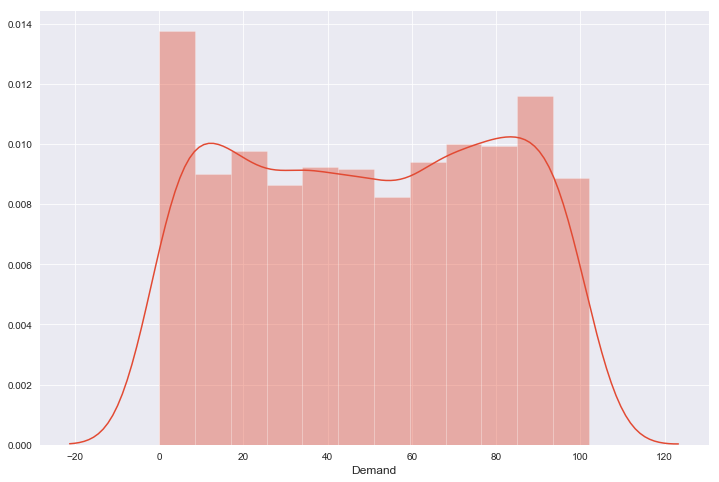

In [209]:
# distribuicao do atributo Demand 
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(data.Demand)


In [210]:
data['Demand'].describe()

count    2000.000000
mean       49.899500
std        30.603459
min         0.000000
25%        22.000000
50%        50.000000
75%        78.000000
max       102.000000
Name: Demand, dtype: float64

In [211]:
data.corr()

,ProductID,OrderKey,OrderType,OrderStatus,Price,StockAvailable,Demand
ProductID,1.000000,0.031503,-0.326262,0.017268,0.924294,-0.036500,-0.022080
OrderKey,0.031503,1.000000,0.045481,-0.087585,0.066486,0.025706,0.031492
OrderType,-0.326262,0.045481,1.000000,0.091288,-0.304509,0.029534,0.009403
OrderStatus,0.017268,-0.087585,0.091288,1.000000,0.024064,-0.018666,-0.016488
Price,0.924294,0.066486,-0.304509,0.024064,1.000000,-0.003364,0.009854
StockAvailable,-0.036500,0.025706,0.029534,-0.018666,-0.003364,1.000000,0.950595
Demand,-0.022080,0.031492,0.009403,-0.016488,0.009854,0.950595,1.000000


In [212]:
correlations = data.corr()
correlations['Demand']

ProductID        -0.022080
OrderKey          0.031492
OrderType         0.009403
OrderStatus      -0.016488
Price             0.009854
StockAvailable    0.950595
Demand            1.000000
Name: Demand, dtype: float64

In [213]:
# ENCODING
# One hot encoding Coluna Store 
import category_encoders as ce
import pandas as pd
dataStore= data['Store']
# Criando objeto para one-hot encoding
encoder=ce.OneHotEncoder(cols='Store',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Original Data
dataStore.head(5)
# One hot encoding Coluna Store - Fit e transform Data
data_encoded1 = encoder.fit_transform(dataStore)
data_encoded1
data_encoded1.head(5)


,Store_MAR,Store_ROT,Store_BUD,Store_AYC,Store_WITZ,Store_MAEG,Store_ADH
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
# ENCODING
# one hot encoding Coluna  Type 
import category_encoders as ce
import pandas as pd
dataType= data['Type']
# Criando o  objeto para one-hot encoding
encoder=ce.OneHotEncoder(cols='Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Original Data
dataType.head(5)
#one hot encoding Coluna Type  - Fit and transform Data
data_encoded2 = encoder.fit_transform(dataType)
data_encoded2
data_encoded2.head(5)

,Type_Customer,Type_SNP,Type_Allocation
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [215]:
# After ENCODING, MERGING DATA
#Merge dos dataframes apos transformacao, data2
data1 = [data, data_encoded1, data_encoded2]
data2 = pd.concat(data1, axis=1)

data2.shape
data2.columns
# data2.head(5)

Index(['ProductID', 'OrderKey', 'Store', 'Type', 'OrderType', 'OrderStatus',
       'Price', 'StockAvailable', 'DateOrderCreated', 'Demand', 'Store_MAR ',
       'Store_ROT ', 'Store_BUD ', 'Store_AYC ', 'Store_WITZ', 'Store_MAEG',
       'Store_ADH ', 'Type_Customer', 'Type_SNP', 'Type_Allocation'],
      dtype='object')

In [216]:
 data2.columns

Index(['ProductID', 'OrderKey', 'Store', 'Type', 'OrderType', 'OrderStatus',
       'Price', 'StockAvailable', 'DateOrderCreated', 'Demand', 'Store_MAR ',
       'Store_ROT ', 'Store_BUD ', 'Store_AYC ', 'Store_WITZ', 'Store_MAEG',
       'Store_ADH ', 'Type_Customer', 'Type_SNP', 'Type_Allocation'],
      dtype='object')

In [217]:
# %%# reordenacao das colunas para facilitar a manipulacao das variaveis de interesse e independentes
data2 = data2[['ProductID', 'OrderKey', 'Store', 'Type',
       'OrderType', 'OrderStatus', 'Price', 'StockAvailable', 'Store_ROT ', 'Store_MAEG', 'Store_AYC ',
       'Store_MAR ', 'Store_WITZ', 'Store_BUD ', 'Store_ADH ',
       'Type_Customer', 'Type_Allocation', 'Type_SNP', 'DateOrderCreated', 'Demand']]
data2.head(5)

,ProductID,OrderKey,Store,Type,OrderType,OrderStatus,Price,StockAvailable,Store_ROT,Store_MAEG,Store_AYC,Store_MAR,Store_WITZ,Store_BUD,Store_ADH,Type_Customer,Type_Allocation,Type_SNP,DateOrderCreated,Demand
0,50294738005,28925092,MAR,Customer,10,9,7.43,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,13
1,50294738005,28927493,MAR,Customer,10,9,7.43,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,18
2,50294738005,28947614,MAR,Customer,10,9,7.43,81,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,53
3,50294738005,28950902,MAR,Customer,10,9,3.90,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,15
4,50294738005,28955694,MAR,Customer,10,9,0.60,97,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,64


In [218]:
# columns = data2.columns.drop(['Store', 'Type', 'DateOrderCreated'])
# columns

In [219]:
# influencia percentual das variaceis independentes com a alvo Demand
correlations = data2.corr()
correlations['Demand']

ProductID         -0.022080
OrderKey           0.031492
OrderType          0.009403
OrderStatus       -0.016488
Price              0.009854
StockAvailable     0.950595
Store_ROT          0.032912
Store_MAEG        -0.026292
Store_AYC         -0.000214
Store_MAR         -0.033525
Store_WITZ         0.001287
Store_BUD          0.045922
Store_ADH          0.015425
Type_Customer      0.015918
Type_Allocation   -0.014696
Type_SNP          -0.008169
Demand             1.000000
Name: Demand, dtype: float64

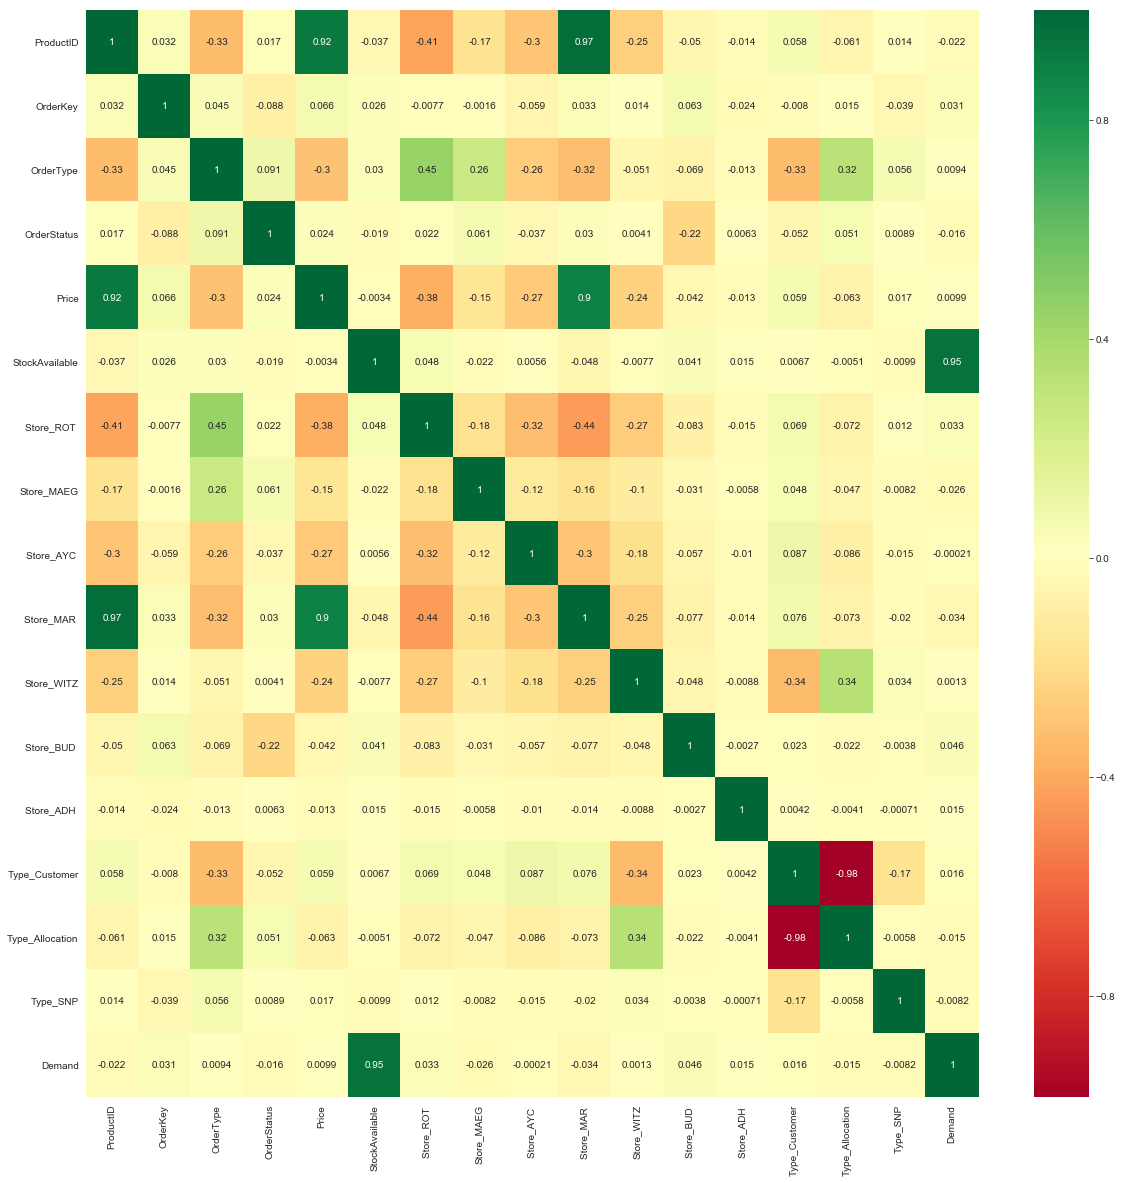

In [220]:
# HeatMap

X = data2.iloc[:,0:16] #independent columns
y = data2.iloc[:,-1]    #target column Demand

# get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap="RdYlGn")




In [221]:
# ========================================================================================== REGRESSAO LINEAR  ================================================================================================

In [222]:
# Checking if there are null values wich can interfer in the forecast models calculations
data2.isnull().values.any()

False

In [223]:
from sklearn.model_selection import train_test_split

In [224]:

data2

,ProductID,OrderKey,Store,Type,OrderType,OrderStatus,Price,StockAvailable,Store_ROT,Store_MAEG,Store_AYC,Store_MAR,Store_WITZ,Store_BUD,Store_ADH,Type_Customer,Type_Allocation,Type_SNP,DateOrderCreated,Demand
0,50294738005,28925092,MAR,Customer,10,9,7.430,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,13
1,50294738005,28927493,MAR,Customer,10,9,7.430,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,18
2,50294738005,28947614,MAR,Customer,10,9,7.430,81,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-30,53
3,50294738005,28950902,MAR,Customer,10,9,3.900,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,15
4,50294738005,28955694,MAR,Customer,10,9,0.600,97,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,64
5,50294738005,28961610,MAR,Customer,10,9,0.384,36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,22
6,50294738005,28965355,MAR,Customer,10,9,7.430,35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,21
7,50294738005,28971426,MAR,Customer,10,9,7.430,34,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,20
8,50294738005,28977652,MAR,Customer,10,9,3.330,64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-29,41
9,50294738005,28991662,MAR,Customer,10,9,7.430,29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-06-28,17


In [225]:
data2.columns

Index(['ProductID', 'OrderKey', 'Store', 'Type', 'OrderType', 'OrderStatus',
       'Price', 'StockAvailable', 'Store_ROT ', 'Store_MAEG', 'Store_AYC ',
       'Store_MAR ', 'Store_WITZ', 'Store_BUD ', 'Store_ADH ', 'Type_Customer',
       'Type_Allocation', 'Type_SNP', 'DateOrderCreated', 'Demand'],
      dtype='object')

In [235]:
del data2['Store']
del data2['Type']
del data2['DateOrderCreated']

In [227]:
columns = data2.columns.drop(['Store', 'Type', 'DateOrderCreated'])
columns

Index(['ProductID', 'OrderKey', 'OrderType', 'OrderStatus', 'Price',
       'StockAvailable', 'Store_ROT ', 'Store_MAEG', 'Store_AYC ',
       'Store_MAR ', 'Store_WITZ', 'Store_BUD ', 'Store_ADH ', 'Type_Customer',
       'Type_Allocation', 'Type_SNP', 'Demand'],
      dtype='object')

In [236]:
X1 = data2.iloc[:,0:16] #independent columns
X1.head(5)

,ProductID,OrderKey,OrderType,OrderStatus,Price,StockAvailable,Store_ROT,Store_MAEG,Store_AYC,Store_MAR,Store_WITZ,Store_BUD,Store_ADH,Type_Customer,Type_Allocation,Type_SNP
0,50294738005,28925092,10,9,7.43,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50294738005,28927493,10,9,7.43,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,50294738005,28947614,10,9,7.43,81,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,50294738005,28950902,10,9,3.90,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50294738005,28955694,10,9,0.60,97,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [237]:

y = data.iloc[:,-1]    #target column Demand
y.head(5)

0    13
1    18
2    53
3    15
4    64
Name: Demand, dtype: int64

In [238]:
# checagem se ha valores nulos 
data2.isnull().values.any()

False

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.20, random_state=42)

In [240]:
# ========================================================================================== REGRESSAO LINEAR MULTIPLA ================================================================================================

In [241]:
import sklearn.linear_model as lm
rlm= lm.LinearRegression()

In [242]:
modelrm = rlm.fit(X_train, y_train)

In [243]:
resultado_lm = rlm.predict(X_test)

In [244]:
mean_squared_error(y_test, resultado_lm)

144.75962455321118

In [245]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, resultado_lm)

4589771088744440.0

In [246]:
from sklearn.metrics import r2_score
r2_score(y_test, resultado_lm, multioutput='uniform_average')

0.8487841188929998

In [247]:
modelrm.score(X_test,y_test)

0.8487841188929998

In [248]:
resultado_lmT = modelrm.predict(X_train)
mean_squared_error(y_train, resultado_lmT)

75.87219445917452

In [249]:
modelrm.score(X_train,y_train)

0.9184496221727364

In [250]:
resultadolrm = modelrm.predict(X_test)

In [251]:
np.set_printoptions(precision=2)
resultlrm = np.concatenate((resultadolrm.reshape(len(resultadolrm),1), y_test.values.reshape(len(y_test),1)),1)

In [252]:
y_comparelrm = pd.DataFrame(resultlrm)

In [253]:
y_comparelrm.describe()

,0,1
count,400.000000,400.000000
mean,49.461819,48.725000
std,29.436961,30.979084
min,-0.934557,0.000000
25%,22.985487,21.750000
50%,47.735439,47.500000
75%,77.365284,77.250000
max,99.652908,102.000000


In [254]:
y_compare = y_comparelrm.rename(index=str, columns={0:'resultadolrm', 1:'y_test'})
y_compare = y_comparelrm.reset_index(drop=True)
y_compare.head(5)

,0,1
0,46.817112,48.0
1,57.766969,58.0
2,69.589467,71.0
3,78.282137,81.0
4,1.716129,4.0


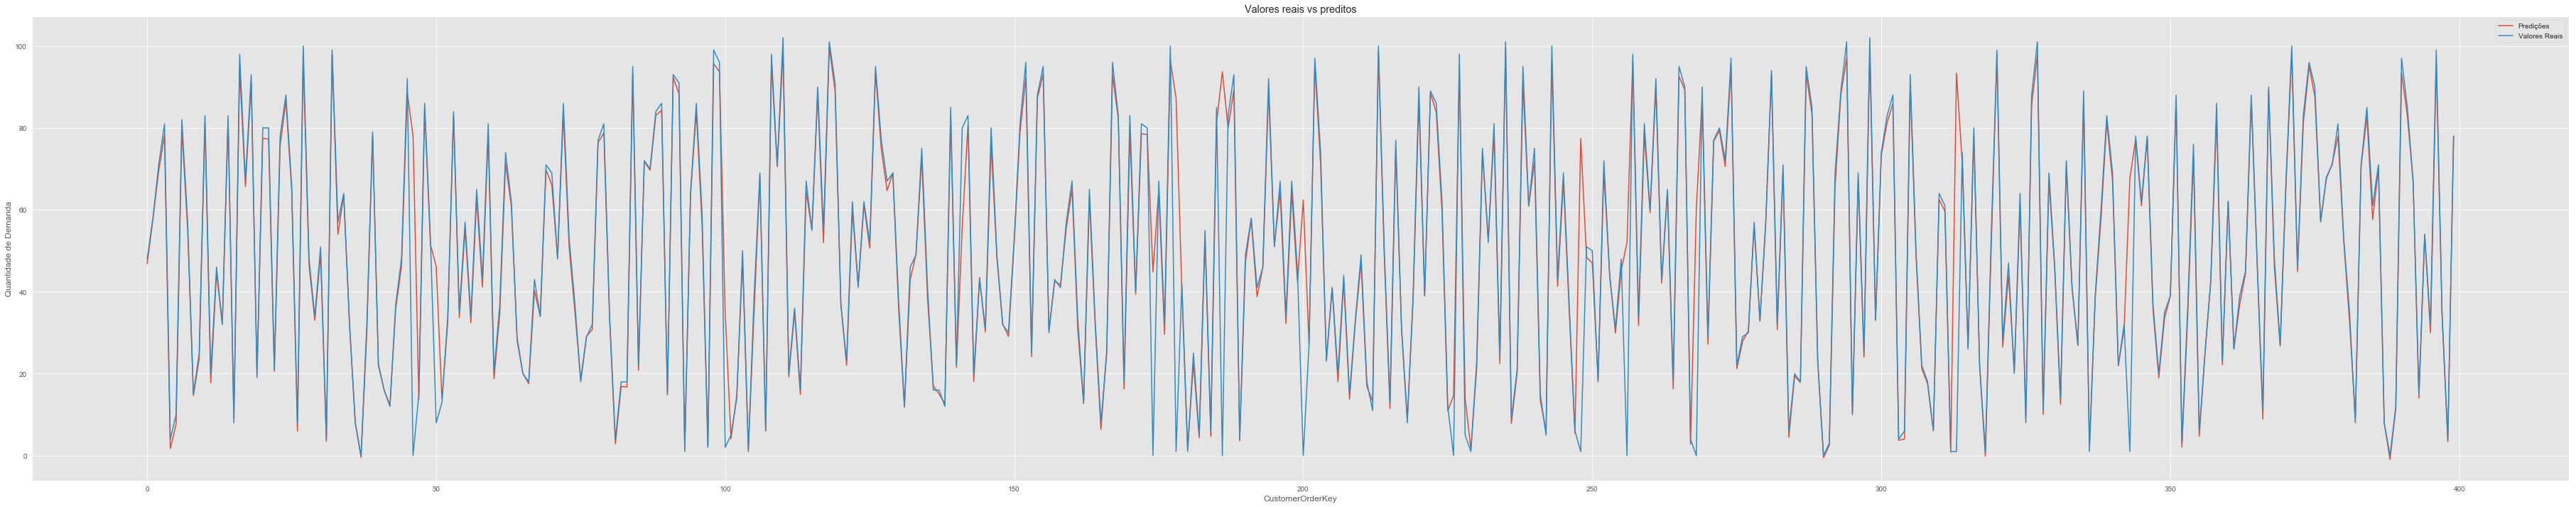

In [255]:
#%% avaliando de forma gráfica os resultados
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

predicoes = pd.DataFrame(y_compare.iloc[:,0])

y_teste2= pd.DataFrame(y_compare.iloc[:,1])

plt.style.use("ggplot")
plt.figure(figsize=(64,12))
plt.xlabel('CustomerOrderKey') 
plt.ylabel('Quantidade de Demanda')
plt.title('Valores reais vs preditos')

plt.plot(y_teste2.index,predicoes)
plt.plot(y_teste2.index,y_teste2)

plt.legend(['Predições','Valores Reais'])
plt.show()

In [256]:
# ========================================================================================== DECISION TREE REGRESSOR ================================================================================================

In [257]:
tree = DecisionTreeRegressor()

In [258]:
model_tree = tree.fit(X_train,y_train)
resultado_tree = tree.predict(X_test)

In [259]:
y_compareDT.describe()

,resultadoDT,y_test
count,400.000000,400.000000
mean,49.687500,48.725000
std,30.599521,30.979084
min,0.000000,0.000000
25%,22.000000,21.750000
50%,48.000000,47.500000
75%,78.000000,77.250000
max,102.000000,102.000000


In [260]:
mean_squared_error(y_test, resultado_tree)

223.78

In [261]:
model_tree.score(X_test,y_test)

0.7662394470933029

In [262]:
resultadoDT = model_tree.predict(X_test)

np.set_printoptions(precision=2)
resultDT = np.concatenate((resultadoDT.reshape(len(resultadoDT),1), y_test.values.reshape(len(y_test),1)),1)

y_compareDT = pd.DataFrame(resultDT)

y_compareDT = y_compareDT.rename(index=str, columns={0:'resultadoDT', 1:'y_test'})
y_compareDT = y_compareDT.reset_index(drop=True)
y_compareDT.head(5)



,resultadoDT,y_test
0,48.0,48.0
1,58.0,58.0
2,71.0,71.0
3,81.0,81.0
4,4.0,4.0


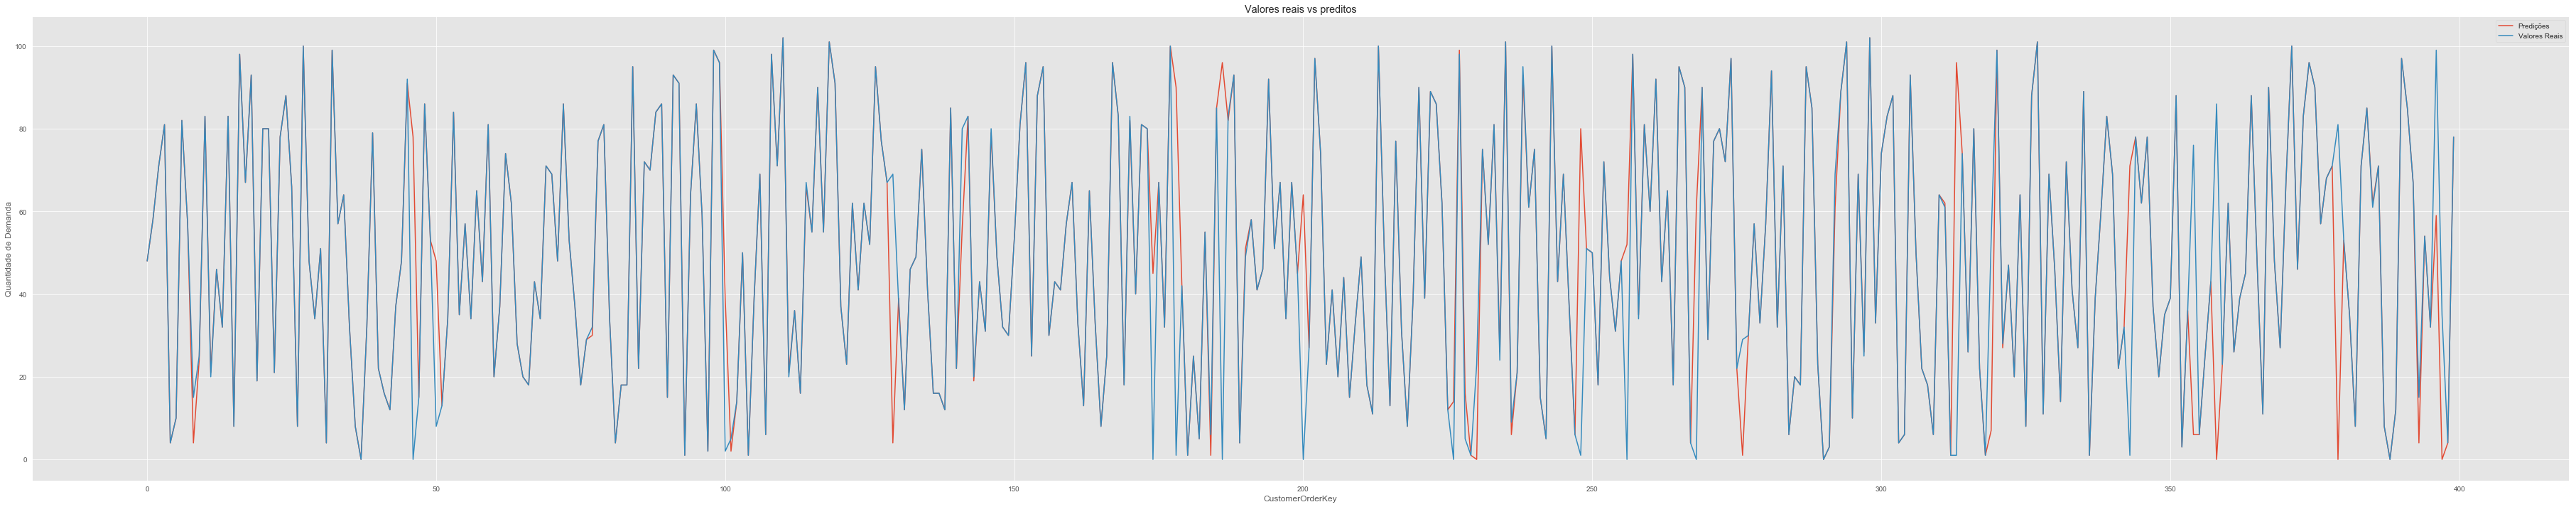

In [263]:
#%% avaliando de forma gráfica os resultados
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

predicoesDT = pd.DataFrame(y_compareDT.iloc[:,0])

y_testeDT= pd.DataFrame(y_compareDT.iloc[:,1])

plt.style.use("ggplot")
plt.figure(figsize=(64,12))
plt.xlabel('CustomerOrderKey') 
plt.ylabel('Quantidade de Demanda')
plt.title('Valores reais vs preditos')

plt.plot(y_testeDT.index,predicoesDT)
plt.plot(y_testeDT.index,y_testeDT)

plt.legend(['Predições','Valores Reais'])
plt.show()

In [264]:
# ========================================================================================== RANDOM FOREST REGRESSOR ================================================================================================

In [265]:
tree_rf = RandomForestRegressor()

In [266]:
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

In [267]:
mean_squared_error(y_test, resultado_rf)

167.76464800000002

In [268]:
model_rf.score(X_test,y_test)

0.8247530750081447

In [269]:

# ajuste dos hiperparametros do Random Forest

from sklearn.model_selection import GridSearchCV

In [270]:
# parâmetros de tunning:
# min_samples_leaf é o número mínimo de amostras necessárias para estar em um nó folha
# min_samples_split é o número mínimo de amostras necessárias para dividir um nó interno
# n_estimators é o número de árvores que será gerada

parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

In [271]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [272]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 250, 500, 750]})

In [283]:
grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 750}

In [284]:
rf_best = grid.best_estimator_

In [285]:
resultado_finalRF2 = rf_best.predict(X_test)

In [286]:
mean_squared_error(y_test, resultado_finalRF2)

146.1986532099874

In [287]:
rf_best.score(X_test,y_test)

0.8472809097838006

In [273]:
resultadoRF = model_rf.predict(X_test)

np.set_printoptions(precision=2)
resultRF = np.concatenate((resultado_rf.reshape(len(resultado_rf),1), y_test.values.reshape(len(y_test),1)),1)

y_compareRF = pd.DataFrame(resultRF)

y_compareRF = y_compareRF.rename(index=str, columns={0:'resultadoRF', 1:'y_test'})
y_compareRF = y_compareRF.reset_index(drop=True)
y_compareRF.head(5)

,resultadoRF,y_test
0,48.03,48.0
1,58.00,58.0
2,64.69,71.0
3,81.00,81.0
4,3.99,4.0


In [274]:
y_compareRF.describe()

,resultadoRF,y_test
count,400.000000,400.000000
mean,49.335750,48.725000
std,29.567063,30.979084
min,0.010000,0.000000
25%,22.670000,21.750000
50%,48.010000,47.500000
75%,74.675000,77.250000
max,101.050000,102.000000


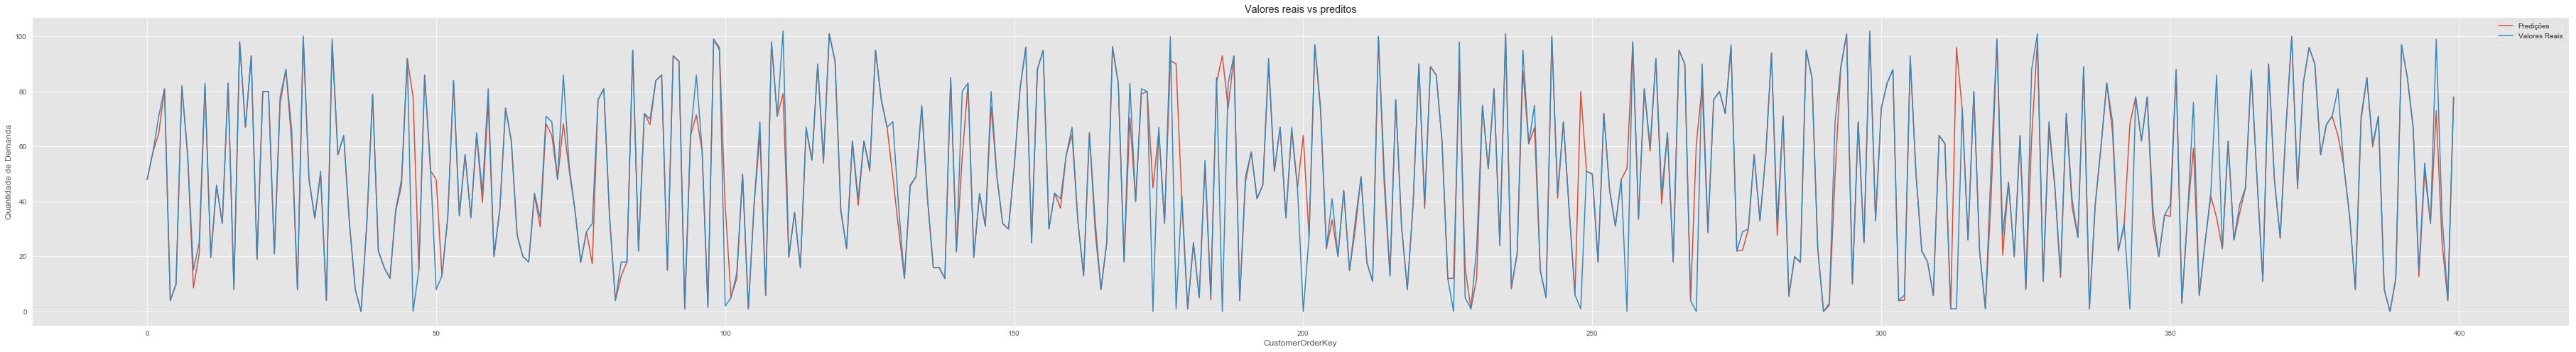

In [275]:
#%% avaliando de forma gráfica os resultados
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

predicoesRF = pd.DataFrame(y_compareRF.iloc[:,0])

y_testeRF= pd.DataFrame(y_compareRF.iloc[:,1])

plt.style.use("ggplot")
plt.figure(figsize=(64,8))
plt.xlabel('CustomerOrderKey') 
plt.ylabel('Quantidade de Demanda')
plt.title('Valores reais vs preditos')

plt.plot(y_testeRF.index,predicoesRF)
plt.plot(y_testeRF.index,y_testeRF)

plt.legend(['Predições','Valores Reais'])
plt.show()

In [276]:
# ========================================================================================== XGBRegressor REGRESSOR ================================================================================================

In [277]:


import xgboost
print(xgboost.__version__)

1.2.0


In [278]:
from xgboost import XGBRegressor

In [279]:
modelXB =  XGBRegressor()


In [280]:

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X1, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [281]:
from numpy import absolute 
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.955 (0.546)


In [282]:
# from numpy import asarray

# # define new data
# row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# new_data = asarray([row])
# # make a prediction
# yhat = modelXB.predict(new_data)
# # summarize prediction
# print('Predicted: %.3f' % yhat)
